# 일일 알러트카운트 시각화

In [41]:
## 모듈설치
import pandas as pd
import matplotlib
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['font.family'] = font_name
plt.rc('font', family='Malgun Gothic')
import warnings
warnings.filterwarnings("ignore")


# 데이터를 불러와봅시다.
day_df = pd.read_excel("./data/geojson/예상데이터_user.xlsx")
day_df.drop(['Unnamed: 0'], axis=1, inplace=True)


# user1의 데이터로 묶어봅시다. =====================================> 나중에 user마다 바꿀 수 있음!!
day_df = day_df.groupby("userID").get_group("user1")


# assignDate로 x축 인덱스를 만들기 위해 한 번 날짜가 어떻게 되나 찾아봅시다.
day_df['day'] = day_df['assignDate'].dt.to_period(freq='D')
display(day_df.head())

,id,userID,shopName,fromAddress,destination,deliveryTime,alertCount,fromLatitude,fromLongitude,desLatitude,desLongitude,distance,assignDate,status,phone,receipt,age,rank,si_gu_dong,day
0,1,user1,초록마을(개포점),서울 강남구 개포2동 186-9,서울시 강남구 언주로 604,NaN,6,37.488939,127.068241,37.509353,127.038862,3.445286,2020-11-16 18:00:00,0,NaN,NaN,27,100,서울특별시 강남구 개포2동,2020-11-16
10,11,user1,마산아구찜,서울 강남구 논현동 143-16,서울시 강남구 언주로 604,NaN,1,37.509079,127.022955,37.509353,127.038862,1.403469,2020-11-17 14:00:00,0,NaN,NaN,27,110,서울특별시 강남구 논현1동,2020-11-17
20,21,user1,연일푸드,서울 강남구 논현동 204,서울시 강남구 언주로 604,NaN,8,37.506314,127.028795,37.509353,127.038862,0.950088,2020-11-18 10:00:00,0,NaN,NaN,27,85,서울특별시 강남구 논현1동,2020-11-18
30,31,user1,본도시락(강남구청),서울 강남구 논현동 254-11,서울시 강남구 언주로 604,NaN,9,37.514471,127.041989,37.509353,127.038862,0.632414,2020-11-19 06:00:00,0,NaN,NaN,27,85,서울특별시 강남구 논현1동,2020-11-19
40,41,user1,메이플,서울 강남구 대치동 896-9,서울시 강남구 언주로 604,NaN,6,37.503549,127.052035,37.509353,127.038862,1.329120,2020-11-20 02:00:00,0,NaN,NaN,27,85,서울특별시 강남구 대치4동,2020-11-20


# 재환이는 데이터값만 받고 싶대!! 그럼 어떻게?!

In [42]:
# 위의 코드를 실행해야 해당 코드도 실행이 됩니다!!
# 이거는 user1을 바탕으로 짠 코드입니다. ==> 유저마다 바꾸고 싶으면 groupby에서 바꿔야 함!

# 요거는 날짜데이터! -> 리스트에 넣자!
day_list = day_df['day'].unique()

# 날짜하고 알러트만 넣어봅시다
day_df_new = day_df[['alertCount', 'day']]

# 날짜끼리 묶어서 계산하기 편하게
day_df_value = day_df_new.groupby("day")

# for 문으로 한번 출력해보자!
for day_series in day_list:
    a = day_df_value.get_group(day_series)
    
    b = a['alertCount'].mean()
    b.astype(int)
#     print(a)
    print(b)
    print("++++++++++")


6.0
++++++++++
1.0
++++++++++
8.0
++++++++++
9.0
++++++++++
5.0
++++++++++
7.0
++++++++++
1.0
++++++++++
4.0
++++++++++
0.0
++++++++++
5.0
++++++++++
1.0
++++++++++
4.0
++++++++++
4.0
++++++++++
6.0
++++++++++
2.0
++++++++++
6.0
++++++++++
4.0
++++++++++
5.0
++++++++++
4.0
++++++++++
4.0
++++++++++
8.0
++++++++++
9.0
++++++++++
2.0
++++++++++
7.0
++++++++++
4.5
++++++++++
9.0
++++++++++
8.0
++++++++++
7.0
++++++++++
9.0
++++++++++
7.0
++++++++++
9.0
++++++++++
7.0
++++++++++
5.0
++++++++++
0.0
++++++++++
8.0
++++++++++


# 일단 시각화코드 지우지 않고 남겨 둡니다.

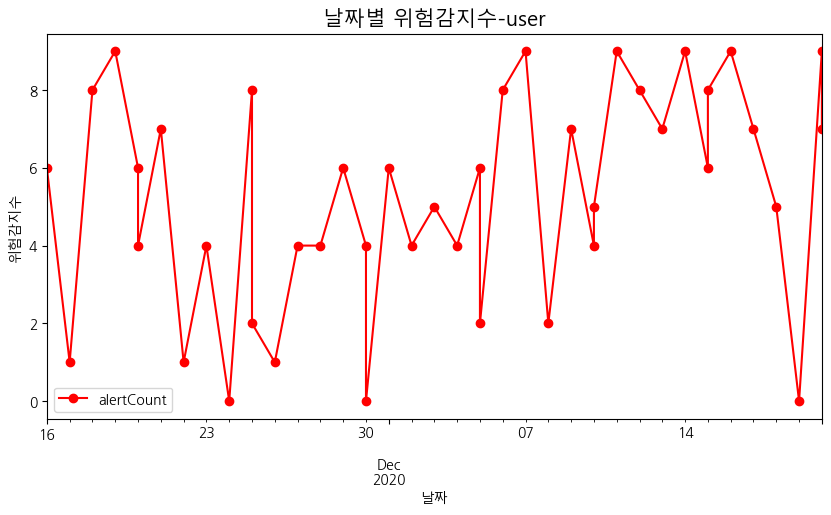

In [43]:
# 시각화를 해봅시다

plt.style.use('default')
day_df.plot(x='day', y='alertCount', marker="o",  color='r', figsize=(10,5))
plt.title("날짜별 위험감지수-user", size=15, fontproperties=font_name) # seaborn에서 한글이 깨진다면 이렇게 각각 fontproperties를 설정해줘야 함
plt.xlabel("날짜", fontproperties=font_name)
plt.ylabel("위험감지수", fontproperties=font_name)

plt.savefig('./data/날짜별 위험감지수.png', bbox_inches='tight')

plt.show()

Object `plot` not found.
